POSTTEST 5 PRAKTIKUM KECERDASAN BUATAN

NAMA : MOHAMMAD FHADIL HAFIDS HARSANDI
NIM  : 2109106072

LINK DATASET : https://drive.google.com/file/d/18b8g24I6PkXcEluEgM1zp2n3E7R3CRE9/view?usp=drive_link

IMPORT LIBRARY

In [332]:
import numpy as np
import pandas as  pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, accuracy_score

MEMBACA DATASET

In [333]:
data = pd.read_csv('Dataset-SA.csv')

memisahkan fitur (X) dari target (y) dalam dataset

In [334]:
X = dataset.drop('Sentiment', axis=1) 
y = dataset['Sentiment']

membatasi jumlah data (baris) dalam dataset menjadi 10.000 baris

In [335]:
line = 10000
if len(data) > line:
    random_indices = np.random.choice(len(data), line, replace=False)
    data = data.iloc[random_indices]

mengubah nilai kategori dalam kolom target y menjadi angka

In [336]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Pemisahan data menjadi data pelatihan dan data pengujian

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pemisahan kolom atau atribut menjadi dua kategori: numerik dan kategorikal. 

In [338]:
numeric = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical = [col for col in X_train.columns if X_train[col].dtype == 'object']

mengubah variabel kategorikal menjadi representasi biner yang sesuai

In [339]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

Membuat kolom data kategorikal pada X_train dan X_test

In [340]:
X_train_encoded = encoder.fit_transform(X_train[categorical])
X_test_encoded = encoder.transform(X_test[categorical])

mengkonversi tipe data menjadi float32

In [341]:

X_train[numeric] = X_train[numeric].astype('float32')
X_test[numeric] = X_test[numeric].astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


Membuat arsitektur model Sequential 

In [342]:
model = Sequential()
model.add(Dense(32, input_dim=3650, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 


mengkonfigurasi model sebelum melatihnya

In [343]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [344]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.84 and logs.get('val_accuracy') > 0.84):
            self.model.stop_training = True

Melatih Model

In [345]:
callback = MyCallback()
history = model.fit(X_train_encoded, y_train, epochs=10, batch_size=64, validation_data=(X_test_encoded, y_test),callbacks=[callback])

Epoch 1/10


ValueError: in user code:

    File "c:\Users\Mohammad Fhadil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Mohammad Fhadil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Mohammad Fhadil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Mohammad Fhadil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Mohammad Fhadil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Mohammad Fhadil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_23" is incompatible with the layer: expected shape=(None, 3650), found shape=(None, 3600)


Evaluasi Model

In [ ]:

score = model.evaluate(X_test_encoded, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: in user code:

    File "c:\Users\Mohammad Fhadil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\Mohammad Fhadil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Mohammad Fhadil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\Mohammad Fhadil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1893, in test_step
        y_pred = self(x, training=False)
    File "c:\Users\Mohammad Fhadil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Mohammad Fhadil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 3643)


Menampilkan grafik model loss dan model accuracy

NameError: name 'history' is not defined

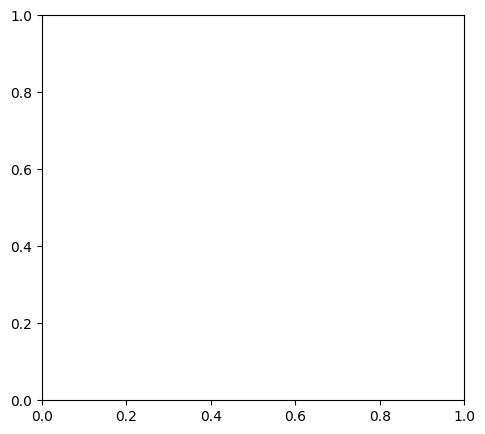

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()